## [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/)
## Cod. 202321287
# W02M2


In [73]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, acos, asin,  latex, atan2, pprint, init_printing, Derivative, sqrt, rad
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting, Point

# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

# Graficar encuentre la velocidad del robot para una trayectoria conocida

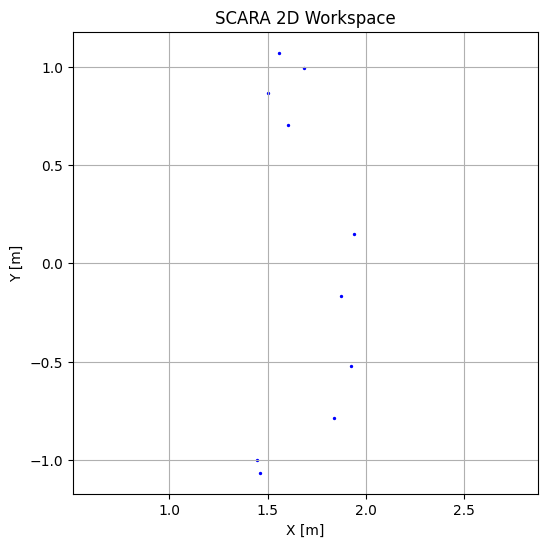

In [74]:
def scara2d(t, l1, l2):
    N = ReferenceFrame('N')
    A = N.orientnew('A', 'Axis', [theta1, N.z])
    B = A.orientnew('B', 'Axis', [theta2, A.z])

    O = Point('O')
    P1 = O.locatenew('P1', L1 * A.x)
    P2 = P1.locatenew('P2', L2 * B.x)

    pos_vec = P2.pos_from(O).express(N).simplify()
    
    valores = {
        theta1: rad(20)*sin(t),
        theta2: rad(60)*cos(t),
        L1: l1,
        L2: l2
    }
    pos_num = pos_vec.subs(valores).evalf()
    return float(pos_num.dot(N.x)), float(pos_num.dot(N.y))


xs, ys = [], []
for t in range(0, 100, 10):
    x, y = scara2d(t, 1, 1)
    xs.append(x)
    ys.append(y)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(xs, ys, s=2, color="blue")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("SCARA 2D Workspace")
plt.axis("equal")
plt.grid(True)
plt.show()

# Propuesta más rápida, con lambdify

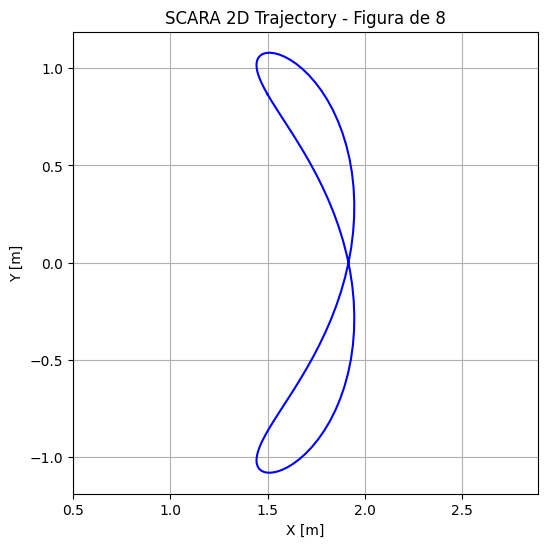

Text(0.5, 1.0, 'SCARA 2D Velocidad')

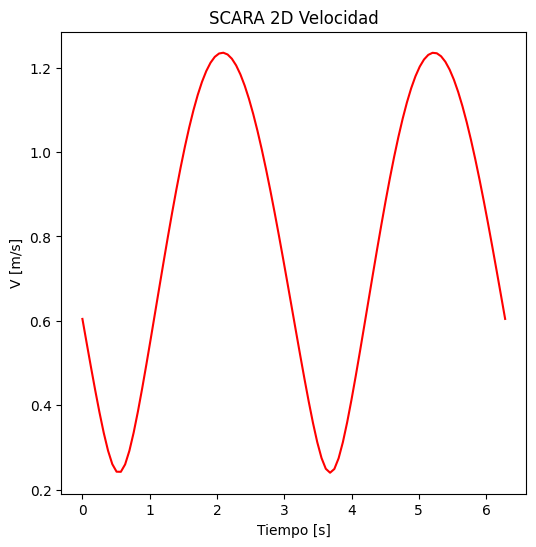

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, sin, cos, diff, integrate
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point
from math import radians as rad

# Define symbols
theta1, theta2 = dynamicsymbols('theta1 theta2')
L1, L2 = symbols('L1 L2')
t, t_var = symbols('t t_var', real=True)

# Build symbolic kinematics once
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [theta1, N.z])
B = A.orientnew('B', 'Axis', [theta2, A.z])

O = Point('O')
P1 = O.locatenew('P1', L1 * A.x)
P2 = P1.locatenew('P2', L2 * B.x)

pos_vec = P2.pos_from(O).express(N)

# Joint motions (in radians)
theta1_expr = rad(20) * sin(t)
theta2_expr = rad(60) * cos(t)  # <-- FIXED!

# Replace symbols with expressions
pos_vec_t = pos_vec.subs({theta1: theta1_expr, theta2: theta2_expr})

# Create fast numerical functions
fx = lambdify((t, L1, L2), pos_vec_t.dot(N.x), "numpy")
fy = lambdify((t, L1, L2), pos_vec_t.dot(N.y), "numpy")

# Generate values
ts = np.linspace(0, 2*np.pi, 100)  # one full cycle
xs = fx(ts, 1, 1)
ys = fy(ts, 1, 1)

# Plot
plt.figure(figsize=(6,6))
plt.plot(xs, ys, color="blue")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("SCARA 2D Trajectory - Figura de 8")
plt.axis("equal")
plt.grid(True)
plt.show()

# Ahora la velocidad
v = pos_vec_t.diff(t, N).magnitude().simplify()

v = lambdify((t, L1, L2), v, "numpy")

# Generar valores
v = v(ts, 1, 1)

# Graficar
plt.figure(figsize=(6,6))
plt.plot(ts, v, color="red")
plt.ylabel("V [m/s]")
plt.xlabel("Tiempo [s]")
plt.title("SCARA 2D Velocidad")

Text(0.5, 1.0, 'SCARA 2D Distancia recorrida')

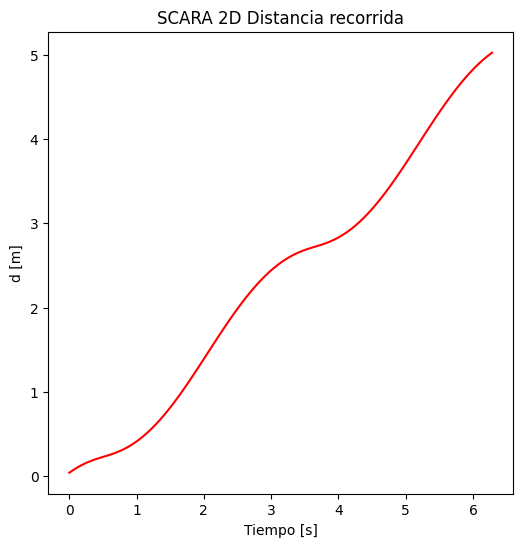

In [ ]:
dis = pos_vec_t.diff(t, N).magnitude().simplify()
dist_lamb = lambdify((t, L1, L2), dis, "numpy")
dt = ts[1]-ts[0]
distancia = np.cumsum(dist_lamb(ts, 1, 1) * dt)

# Graficar
plt.figure(figsize=(6,6))
plt.plot(ts, distancia, color="red")
plt.ylabel("d [m]")
plt.xlabel("Tiempo [s]")
plt.title("SCARA 2D Distancia recorrida")


# Ejemplo de clase

In [77]:
expr = L1**2

# lambdify?

def mifuncion(x):
    return x**2+2*x+1

fun = lambda x: x**2+2*x+1
fun(1)

4